In [1]:
import numpy as np
import pandas as pd
from sklearn import manifold
import altair as alt
import scprep
import umap
import matplotlib.pyplot as plt
%matplotlib inline
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

### Tutorial Single Cell Workshop 
taken from: [Single Cell workshop](https://github.com/KrishnaswamyLab/SingleCellWorkshop/blob/1725da27d3c2a2358b5e818428bbcd150376597a/exercises/Dimensionality_Reduction/03_Advanced_Dimensionality_reduction_EB_data.ipynb)

In [2]:
def visualize_genes(genes_list_for_plotting, original_data, embedded_data, umap_embedding=True):
    label_prefix = "umap" if umap_embedding else "t-SNE"
    
    fig, axes = plt.subplots(1,3, figsize=(14,4))
    axes = axes.flatten()

    for gene, ax in zip(genes_list_for_plotting, axes.flatten()):
        expression = scprep.select.select_cols(original_data, exact_word=gene)
        sort_index = expression.sort_values().index
        scprep.plot.scatter2d(embedded_data.loc[sort_index], c=np.array(expression.loc[sort_index],dtype=float), shuffle=False,  title=gene, ticks=None, label_prefix=label_prefix, ax=ax)

    fig.tight_layout()

    
def reduce_dims_data_with_pca(big_data, n_components=50):
    return scprep.reduce.pca(big_data, n_components=n_components, method='dense')

In [3]:
scprep.io.download.download_google_drive(id='14ahKKvzjlSa5w6YUDUthNESHGU8naPdw', destination='data.pickle.gz')
scprep.io.download.download_google_drive(id='1-XvGMHn_fluRlxcyoScVCSQphrvABSsj', destination='metadata.pickle.gz')
data = pd.read_pickle('data.pickle.gz')
metadata = pd.read_pickle('metadata.pickle.gz')

In [4]:
data.head(1)

,A1BG (ENSG00000121410),A1BG-AS1 (ENSG00000268895),A2M (ENSG00000175899),A2M-AS1 (ENSG00000245105),A2ML1 (ENSG00000166535),A4GALT (ENSG00000128274),AAAS (ENSG00000094914),AACS (ENSG00000081760),AADAT (ENSG00000109576),AAED1 (ENSG00000158122),...,ZW10 (ENSG00000086827),ZWILCH (ENSG00000174442),ZWINT (ENSG00000122952),ZXDA (ENSG00000198205),ZXDB (ENSG00000198455),ZXDC (ENSG00000070476),ZYG11B (ENSG00000162378),ZYX (ENSG00000159840),ZZEF1 (ENSG00000074755),ZZZ3 (ENSG00000036549)
AAACATTGAAAGCA-1_Day 00-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.867284,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data_pca = scprep.reduce.pca(data, n_components=50, method='dense')
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
AAACATTGAAAGCA-1_Day 00-03,-16.909561,-5.483646,9.412028,1.318436,-3.177474,-2.121721,6.087122,0.079953,0.943243,-2.630093,...,-0.749199,-2.719711,-1.808044,1.299992,0.275658,-1.456450,0.005871,-2.195751,-0.044468,1.321114
AAACCGTGCAGAAA-1_Day 00-03,-13.287124,-0.692762,-1.612985,-2.101323,-4.128350,-6.736175,-1.865726,-1.384690,-2.494608,0.190764,...,-0.047642,-0.708220,0.044748,0.418158,3.269895,-2.059953,0.164306,0.275773,-0.083614,0.336068
AAACGCACCGGTAT-1_Day 00-03,-18.064574,-3.211706,9.253775,5.895484,-0.026659,-0.086860,7.433823,-4.867969,-1.795822,-4.639522,...,-0.438037,1.189666,-1.410448,0.008253,-1.373958,0.085503,-0.133515,-0.922109,0.856580,1.058645
AAAGATCTGGTACT-1_Day 00-03,-18.010823,-3.198141,8.393959,4.450570,-3.131125,2.046023,3.343176,-3.257969,-2.773164,-4.330662,...,0.843200,2.062840,-0.998387,-0.355185,-0.375876,0.483187,0.399269,0.987207,-1.144742,-0.294697
AAAGGCCTAACCGT-1_Day 00-03,-15.154177,-0.485407,7.421667,3.662796,-2.833019,-1.813249,2.512552,-2.175097,-0.999115,-1.457235,...,-0.313874,2.182161,-0.773929,0.968150,0.699412,0.597526,-1.545825,-0.387924,-1.183566,-0.265612


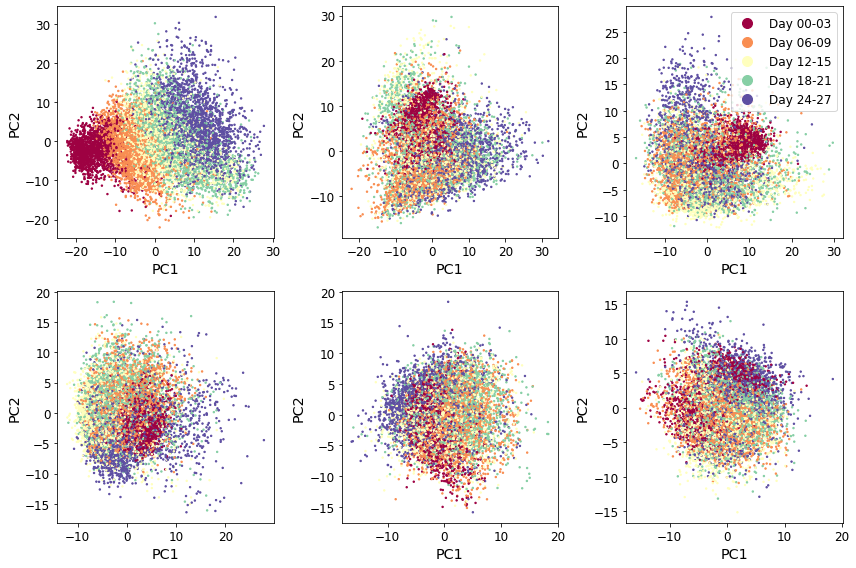

In [6]:
# Create a figure (the background) and a set of axes (the things we plot on)
fig, axes = plt.subplots(2,3, figsize=(12,8))
# This makes it easier to iterate through the axes
axes = axes.flatten()

for i, ax in enumerate(axes):
    # only plot a legend on one axis
    legend = True if i == 2 else False
    # There are a lot of parameters here, you can find the full scatter documentation at
    # https://scprep.readthedocs.io/en/stable/reference.html#scprep.plot.scatter
    scprep.plot.scatter(data_pca.iloc[:,i], data_pca.iloc[:,i+1], c=metadata['sample_labels'], cmap='Spectral', ax=ax, label_prefix="PC", legend=legend)
fig.tight_layout()

Index(['AAACATTGAAAGCA-1_Day 00-03', 'CAGTTTACCCTTCG-1_Day 18-21',
       'CATAAATGGCCAAT-1_Day 18-21', 'CATAAATGGTCGTA-1_Day 18-21',
       'CATACTTGGGAACG-1_Day 18-21', 'CATAGTCTCCTTGC-1_Day 18-21',
       'CATATAGATGCCCT-1_Day 18-21', 'CAGTTACTCCGATA-1_Day 18-21',
       'CATCAACTCCGCTT-1_Day 18-21', 'CATCCCGATAGCCA-1_Day 18-21'],
      dtype='object')


/home/ionelia/pycharm-projects/master/semester2/internshipISTaustria/venv/lib/python3.7/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<AxesSubplot:title={'center':'SOX10'}, xlabel='PC1', ylabel='PC2'>

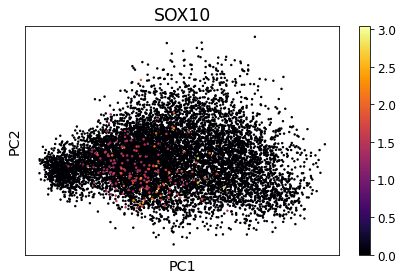

In [7]:
gene = 'SOX10'

expression = scprep.select.select_cols(data, starts_with=gene)

# we will sort cells by maximum expression so we can see where the gene is expressed
sort_index = expression.sort_values().index
print(sort_index[:10])
scprep.plot.scatter2d(data_pca.loc[sort_index], c=expression.loc[sort_index], shuffle=False, title=gene, ticks=None, label_prefix='PC')

In [8]:
data_umap_tutorial = umap.UMAP().fit_transform(data_pca.iloc[:,:50])
data_umap_tutorial = pd.DataFrame(data_umap_tutorial, index = data.index)

/home/ionelia/pycharm-projects/master/semester2/internshipISTaustria/venv/lib/python3.7/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


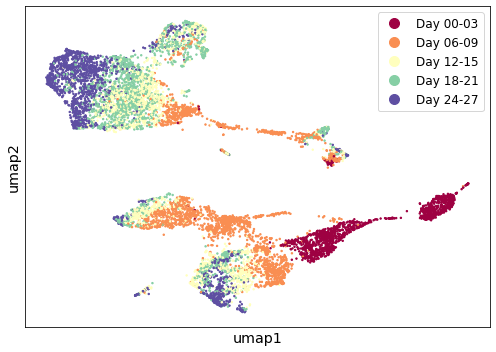

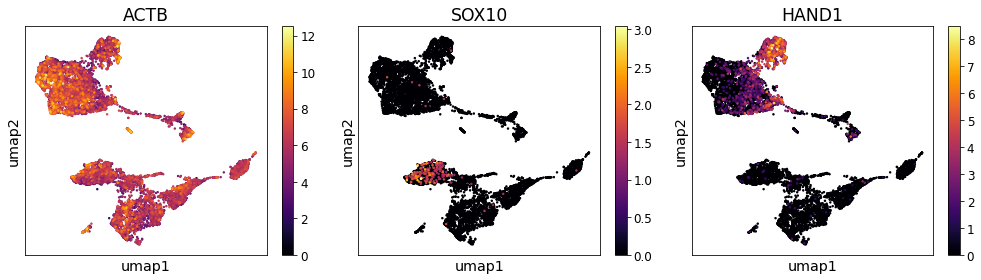

In [9]:
scprep.plot.scatter2d(data_umap_tutorial, c=metadata['sample_labels'], cmap='Spectral',  ticks=False, label_prefix='umap', legend_anchor=(1,1), figsize=(7,5))
    
genes_for_plotting = ['ACTB', 'SOX10', 'HAND1']
visualize_genes(genes_for_plotting, data, data_umap_tutorial, umap_embedding=True)

# **Mouse data: find the genes that are unique in the healthy and diseased conditions.**

In [10]:
full_control_filepath = "../data/Tran_RGC_scRNA/unzipped/GSE137398_ONCRGCs_control_count_mat.csv"
full_disease_filepath = "../data/Tran_RGC_scRNA/unzipped/GSE137398_ONCRGCs_2w_afterCrush_count_mat.csv"
quality_control_trimmed_control_filepath = ""
quality_control_trimmed_disease_filepath = ""
test = "../data/Tran_RGC_scRNA/npys/toy-data/split-control_and_2w_after_crush_5000x5000_toy/test.npy"

## Loading and preprocess the data for the embbedings below

In [11]:
stacked = "../data/Tran_RGC_scRNA/npys/stacked/control_2w.npy"
stacked = np.load(stacked, allow_pickle=True)
np.random.shuffle(stacked[1:]) # inplace row-wise shuffling
data_without_meta = stacked[1:,:-1]
genes_names = stacked[0,:-1]
labels = stacked[1:,-1]
# stacked_pandas = pd.DataFrame(data=stacked[1:,:-1], index=labels,columns=genes_names)
stacked_pandas = pd.DataFrame(data=stacked[1:,:-1], columns=genes_names)
labels_encoding, labels_categorical = np.unique(labels, return_inverse=True)
labels_encoding, labels_categorical

(array(['2w_after_crush', 'control'], dtype=object),
 array([0, 0, 1, ..., 0, 1, 1]))

### Because the data is big, to speed up the embedding, reduce it first to the first few pca components.

In [12]:
mouse_data_pca = reduce_dims_data_with_pca(stacked_pandas[:100], n_components=50)

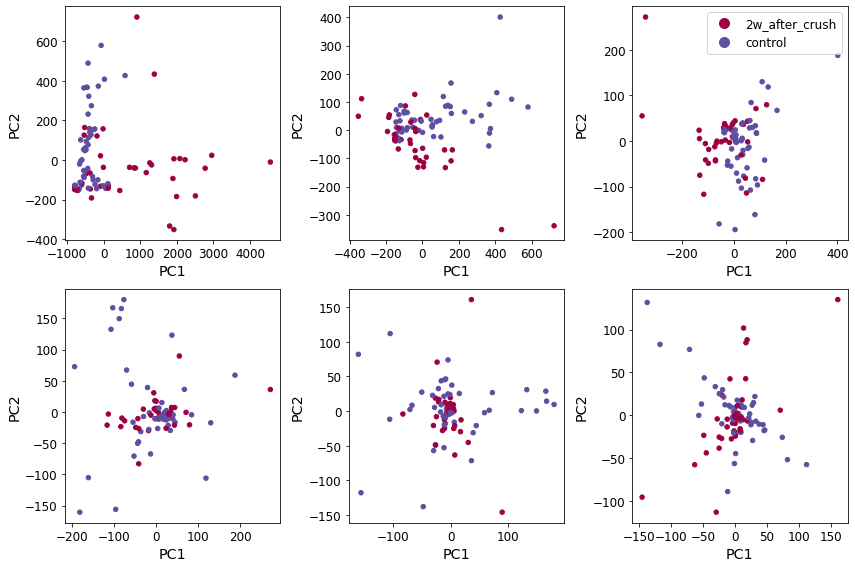

In [13]:
# Create a figure (the background) and a set of axes (the things we plot on)
fig, axes = plt.subplots(2,3, figsize=(12,8))
# This makes it easier to iterate through the axes
axes = axes.flatten()

for i, ax in enumerate(axes):
    # only plot a legend on one axis
    legend = True if i == 2 else False
    # There are a lot of parameters here, you can find the full scatter documentation at
    # https://scprep.readthedocs.io/en/stable/reference.html#scprep.plot.scatter
    scprep.plot.scatter(mouse_data_pca.iloc[:,i], mouse_data_pca.iloc[:,i+1], c=labels[:100], cmap='Spectral', ax=ax, label_prefix="PC", legend=legend)
fig.tight_layout()

In [15]:
first_one_hundred = stacked[1:100, :-1].sum(0)
first_one_hundred.shape
first_one_hundred_with_names = np.vstack((genes_names, first_one_hundred))
genes_nonzero = np.array([i for j, i in enumerate(first_one_hundred_with_names[0]) if first_one_hundred_with_names[1, j] != 0])
print(genes_nonzero.shape, "\n", genes_nonzero)

(15824,) 
 ['Lypla1' 'Tcea1' 'Atp6v1h' ... 'Uty' 'Ddx3y' 'MSTRG.21500']


34.0


/home/ionelia/pycharm-projects/master/semester2/internshipISTaustria/venv/lib/python3.7/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<AxesSubplot:title={'center':'Lypla1'}, xlabel='PC1', ylabel='PC2'>

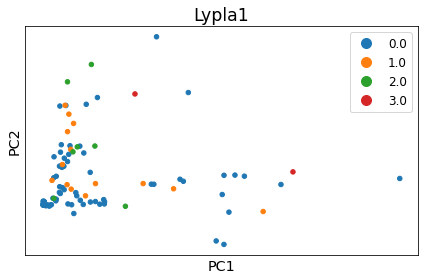

In [16]:
gene = 'Lypla1'
expression = scprep.select.select_cols(stacked_pandas[:100], starts_with=gene)
sort_cells_by_max_expression_to_see_where_gene_is_expressed = expression.sort_values().index
expression = expression.astype(float)
print(expression.sum())
scprep.plot.scatter2d(mouse_data_pca.loc[sort_cells_by_max_expression_to_see_where_gene_is_expressed], 
                      c=expression.loc[sort_cells_by_max_expression_to_see_where_gene_is_expressed], 
                      shuffle=False, title=gene, ticks=None, label_prefix='PC')

In [200]:
mouse_data_pca.shape

(100, 50)

In [17]:
sort_cells_by_max_expression_to_see_where_gene_is_expressed

Int64Index([ 0, 68, 67, 66, 65, 63, 62, 61, 60, 69, 59, 55, 54, 53, 52, 51, 50,
            48, 47, 57, 46, 70, 72, 97, 96, 95, 94, 93, 92, 91, 90, 71, 88, 86,
            82, 81, 79, 77, 75, 74, 73, 87, 44, 49, 42, 23, 21, 43, 17, 16, 15,
            14, 13, 24, 12, 10,  8,  7,  6,  5,  4,  2,  1, 11, 25, 20, 34, 36,
            39, 33, 37, 32, 40, 38, 30, 29, 27, 31, 89,  9, 35, 85, 84, 28,  3,
            80, 56, 76, 41, 98, 78, 45, 64, 26, 58, 18, 22, 99, 19, 83],
           dtype='int64')

In [18]:
mouse_data_pca.loc[sort_cells_by_max_expression_to_see_where_gene_is_expressed]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50
0,-329.417936,-192.138409,-4.511679,9.389726,-5.344645,8.011638,-4.235105,3.076858,-5.294032,-5.215335,...,-2.928885,-2.666636,-2.702558,-1.796067,-2.739321,2.848011,2.176256,2.138595,0.026530,1.434345
68,130.754460,-131.548926,7.710936,-1.019878,5.949953,0.119081,-9.542866,2.534397,5.538902,-11.121185,...,-1.184038,-4.064288,3.355529,5.869444,4.526244,9.408042,-4.288652,-4.871493,-9.128674,-8.845704
67,-448.879120,366.489136,91.922095,-96.471183,-155.966443,-117.673346,82.790020,185.253735,-12.721138,-53.862019,...,-14.799059,0.238414,-9.492566,12.559877,2.012562,-2.112140,0.871022,-6.708369,3.327378,3.536585
66,-508.016285,46.580381,38.344306,-77.057366,179.989405,9.606561,11.761286,9.306896,-8.033891,-21.812784,...,13.097713,-15.267967,14.199604,-28.891663,-1.780498,-22.413288,-1.301222,5.132020,-13.656113,6.362461
65,-751.095027,-144.253509,-29.500390,30.425302,-2.631163,1.272292,-4.318709,-2.572094,-9.573682,-7.417102,...,-3.309638,-4.713059,-0.427232,-0.917229,-2.492005,-1.430804,4.581897,2.193877,-1.128369,2.146349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,-66.714610,578.691534,82.097626,-161.488323,-105.272492,111.844297,-57.758104,-40.619641,-88.299683,-18.925267,...,-10.957717,-3.819708,-4.333575,-1.977652,-4.697776,-1.499782,-0.482392,1.157742,-1.177615,-0.769581
22,-628.461194,-113.651684,-6.440187,23.536313,-12.870444,-7.088696,9.751234,-24.688741,2.532318,-1.210561,...,-2.774757,-1.756358,1.732152,0.045116,-4.821011,5.466716,0.408044,-3.612681,-2.623922,1.930380
99,443.221300,-154.565837,-16.032543,-3.292634,18.098691,-12.563336,-13.722707,-0.286358,-0.666422,-25.069457,...,1.695577,17.890613,-20.919498,-3.434113,9.974015,23.074920,-20.760031,0.339776,-11.284656,12.560553
19,586.595765,426.154444,401.250495,187.546476,58.937062,-2.254560,-20.678010,75.448632,24.866987,84.491743,...,-4.049605,-3.036772,-3.290435,-4.919546,-2.542604,-2.939296,0.790913,2.096168,3.262305,5.361887


## Embedding with t-SNE

In [4]:
%timeit
tsne_op = manifold.TSNE(n_components=2, perplexity=50)
data_tsne = tsne_op.fit_transform(stacked_pandas[:])

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.63 µs


In [19]:
data_tsne = pd.DataFrame(data_tsne, index=labels[:])

In [20]:
data_tsne.describe(), data_tsne.shape

(                  0             1
 count  32076.000000  32076.000000
 mean      -0.106596     -0.551225
 std       30.057510     28.730577
 min      -71.470947    -69.743973
 25%      -23.130278    -23.566105
 50%        1.167595     -1.083739
 75%       23.586565     21.076893
 max       67.356750     73.432930,
 (32076, 2))

/home/ionelia/pycharm-projects/master/semester2/internshipISTaustria/venv/lib/python3.7/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<AxesSubplot:xlabel='t-SNE1', ylabel='t-SNE2'>

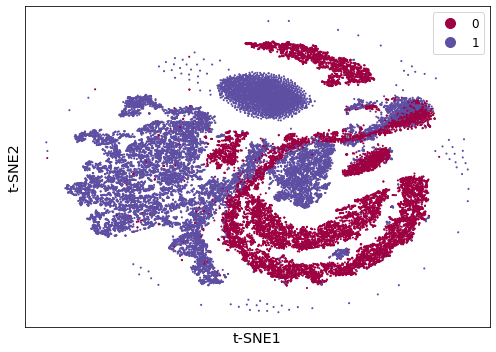

In [21]:
scprep.plot.scatter2d(data_tsne, c=labels_categorical[:], cmap='Spectral',  ticks=False, label_prefix='t-SNE', legend_anchor=(1,1), figsize=(7,5))

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(14,4))
axes = axes.flatten()


genes_for_plotting = ['4933401J01Rik', 'Gm26206', 'Gm1992']

for gene, ax in zip(genes_for_plotting, axes):
    expression = scprep.select.select_cols(stacked_pandas[:], exact_word=gene)
    
    sort_index = expression.sort_values().index
    
    scprep.plot.scatter2d(stacked_pandas[:].loc[sort_index], c=np.array(expression.loc[sort_index],dtype=float), shuffle=False, 
                          title=gene, ticks=None, label_prefix='t-SNE', ax=ax)
    
fig.tight_layout()

## Embedding with UMAP

In [19]:
%timeit
data_umap = umap.UMAP().fit_transform(mouse_data_pca)
data_umap = pd.DataFrame(data_umap, index = labels[:100])

/home/ionelia/pycharm-projects/master/semester2/internshipISTaustria/venv/lib/python3.7/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<AxesSubplot:xlabel='t-SNE1', ylabel='t-SNE2'>

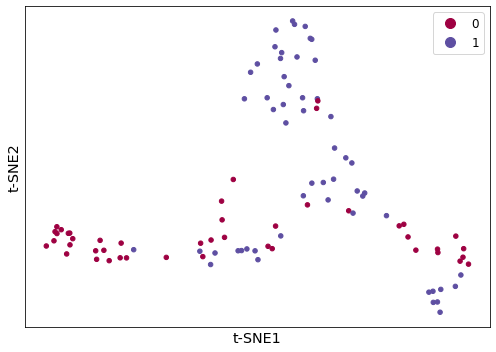

In [20]:
scprep.plot.scatter2d(data_umap, c=labels_categorical[:100], cmap='Spectral',  ticks=False, label_prefix='t-SNE', legend_anchor=(1,1), figsize=(7,5))

In [35]:
genes_names

array(['4933401J01Rik', 'Gm26206', 'Gm1992', ..., 'Gm28301', 'Gm21860',
       'Gm21748'], dtype=object)

In [32]:
data_umap.index = mouse_data_pca.index # TODO fix this, doing this data_umap losses the class labels, but i could get the labels from the index to labels

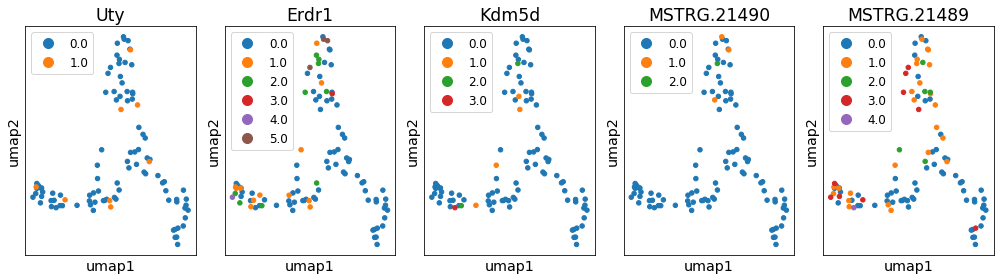

In [49]:
fig, axes = plt.subplots(1,5, figsize=(14,4))
axes = axes.flatten()

genes_for_plotting = ['Lypla1']
genes_for_plotting = list(genes_names)

for ax in axes:
    plotted = False
    while not plotted:
        if not genes_for_plotting:
            break
        gene = genes_for_plotting.pop()
        expression = scprep.select.select_cols(stacked_pandas[:100], exact_word=gene)
        sum_expression = expression.sum()
        if sum_expression == 0:
            genes_for_plotting.pop()
            continue
        sort_index = expression.sort_values().index
        scprep.plot.scatter2d(data_umap[:].loc[sort_index], c=np.array(expression.loc[sort_index], dtype=float), shuffle=False, title=gene, ticks=None, label_prefix='umap', ax=ax)
        plotted = True
fig.tight_layout()        